# Project 01: Color-Based Object Detection
## using HSV color map

- the reason behind  using HSV color map for object detection because  `HSV` is easier to represent color ranges compared to `BGR`.

### Import necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Custom Functions

In [4]:
def viewImage_opencv(image):
    cv.imshow("image", image)
    cv.waitKey(0)
    cv.destroyAllWindows()



def viewImage_matplotlib(image, axis_flag=True):
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    if axis_flag != True:
        plt.axis('off')
    plt.show()

### Load an image or video for testing

In [5]:
image = cv.imread('traffic_lights.jpg')

#### Display Image in openCV

In [6]:
viewImage_opencv(image)

####  Display in Matplotlib

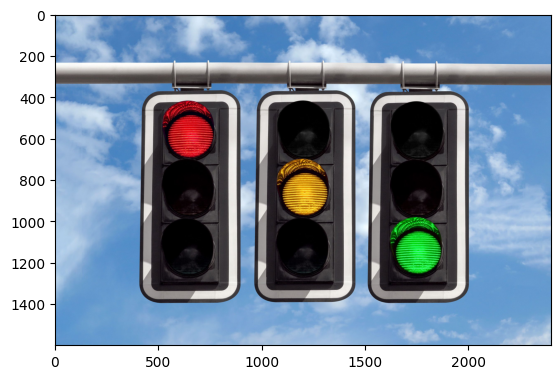

In [7]:
viewImage_matplotlib(image)

In [8]:
# Convert the image from BGR to HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

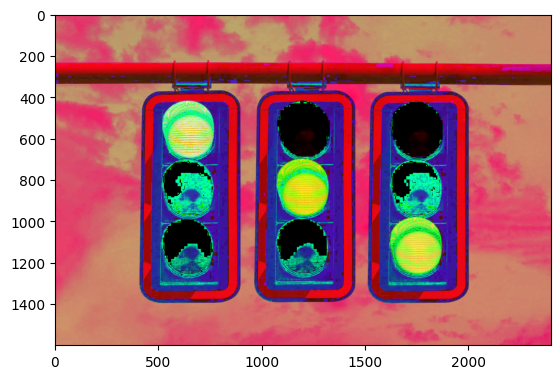

In [9]:
viewImage_matplotlib(hsv_image)

In [10]:
# Define color range for detection (e.g., detecting red objects)
lower_bound = np.array([170, 100, 100]) # [0, 100, 100]
upper_bound = np.array([180, 255, 255])

In [11]:
# Create a mask to extract the object based on the color range
mask = cv.inRange(hsv_image, lower_bound, upper_bound)


- when mask is applyed the colored object only be displayed

In [12]:
# Apply morphological operations (optional)
# mask = cv.erode(mask, None, iterations=2)
# mask = cv.dilate(mask, None, iterations=2)

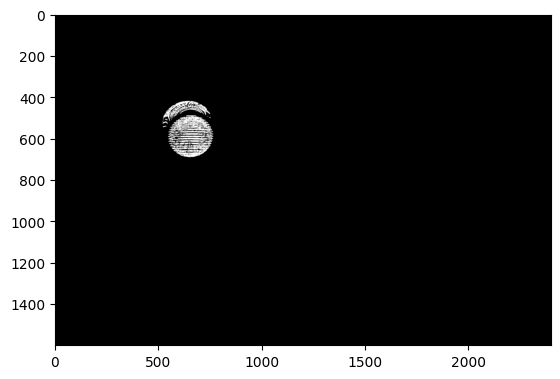

In [13]:
viewImage_matplotlib(mask)

In [14]:
# Display masked image
cv.imshow('Masked Image', cv.bitwise_and(image, image, mask=mask))
cv.waitKey(0)
cv.destroyAllWindows()


In [15]:
# Bitwise-AND mask and original image to get the detected object
detected_object = cv.bitwise_and(image, image, mask=mask)

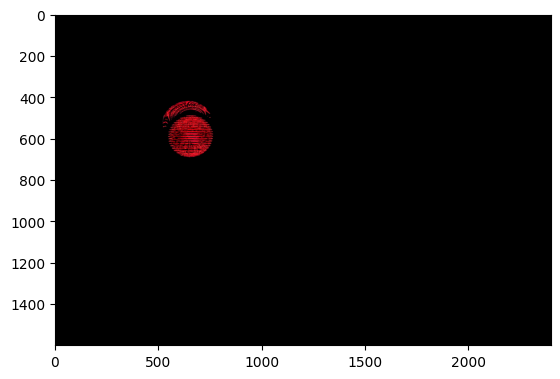

In [16]:
viewImage_matplotlib(detected_object)

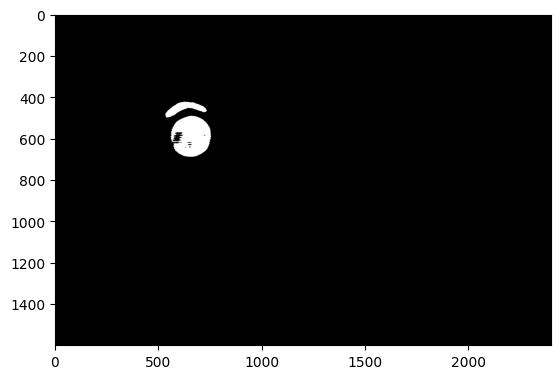

In [17]:
# apply mediam Blur for more refinement
mask_median_blur= cv.medianBlur(
    src=mask,
    ksize=29
)
viewImage_matplotlib(mask_median_blur)

In [18]:
# Apply contours
contours, _  = cv.findContours(
    image=mask_median_blur,
    mode=cv.RETR_EXTERNAL,
    method=cv.CHAIN_APPROX_SIMPLE
)

In [19]:
# to get the coordinates around the masked object and draw rectangle
if contours:
    contour = contours[0]
    x, y, width, height = cv.boundingRect(contour)
    cv.rectangle(
        img=image,
        pt1=(x, y),
        pt2=(x+width, y+height),
        color=(0, 255, 0),
        thickness=3
    )
    cv.putText(
        img=image,
        text="Red Signal",
        org=(x, y),
        fontScale=1,
        fontFace=cv.FONT_HERSHEY_COMPLEX,
        color=(0, 0, 255),
        thickness=3
    )
else:
    print("Red Color Is Not Detected")

In [20]:
def detect_redSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([170, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([180, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the firstmasked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 0, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="RED",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 0, 255),
            thickness=3
        )
    else:
        print("Red Color Is Not Detected")
        
    cv.imshow("image", image)
    
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis()
    plt.show()
    
    cv.waitKey(0)
    cv.destroyAllWindows()

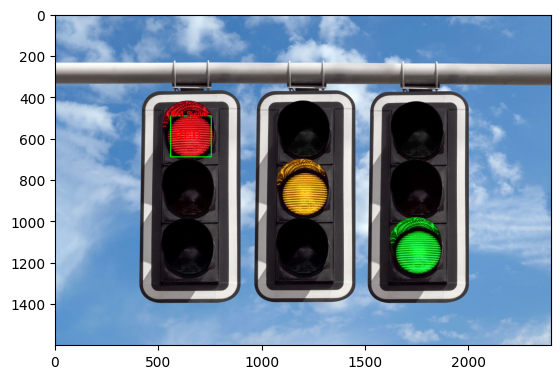

In [21]:
detect_redSignal(image)

In [22]:
def detect_yellowSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([15, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([25, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="YELLOW",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 255),
            thickness=3
        )
    else:
        print("yellow Color Is Not Detected")
    
    cv.imshow("image", image)
    
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis()
    plt.show()
    
    cv.waitKey(0)
    cv.destroyAllWindows()

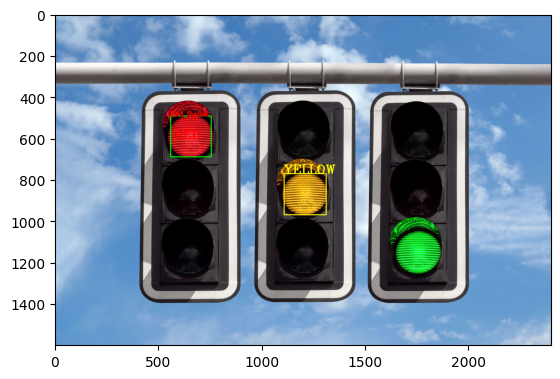

In [23]:
detect_yellowSignal(image)

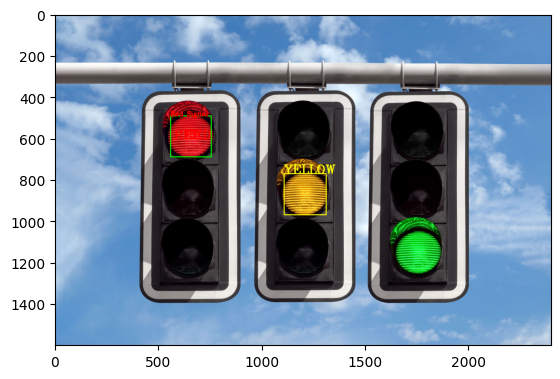

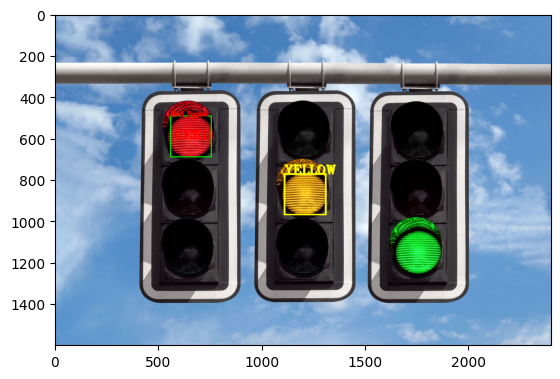

In [24]:

detect_redSignal(image)
detect_yellowSignal(image)

In [25]:
def detect_greenSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([55, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([65, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 0),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="GREEN",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 0),
            thickness=3
        )
    else:
        print("Green Color Is Not Detected")
    
    cv.imshow("image", image)
    
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis()
    plt.show()
    
    cv.waitKey(0)
    cv.destroyAllWindows()

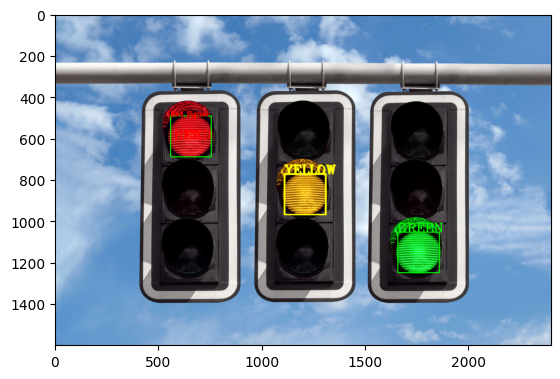

In [26]:
detect_greenSignal(image)

# Full Code of the project

In [27]:
def detect_redSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([170, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([180, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the firstmasked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 0, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="RED",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 0, 255),
            thickness=3
        )
    else:
        print("Red Color Is Not Detected")
        
def detect_yellowSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([15, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([25, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="YELLOW",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 255),
            thickness=3
        )
    else:
        print("yellow Color Is Not Detected")

def detect_greenSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([55, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([65, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 0),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="GREEN",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 0),
            thickness=3
        )
    else:
        print("Green Color Is Not Detected")
    cv.imshow("image", image)
    
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis()
    plt.show()
    
    cv.waitKey(0)
    cv.destroyAllWindows()

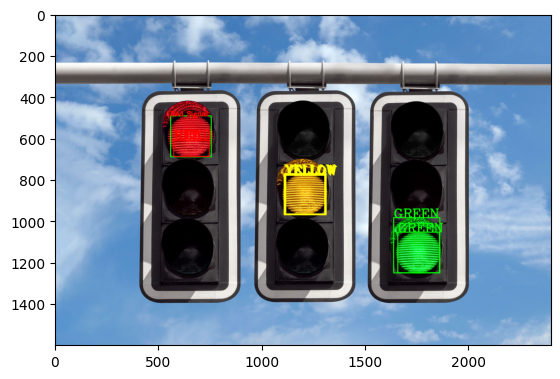

In [28]:
detect_redSignal(image)
detect_yellowSignal(image)
detect_greenSignal(image)

